In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("suicide_rates.csv")
data = data[
    [
        "country",
        "year",
        "sex",
        "age",
        "suicides_no",
        "population",
        "suicides/100k pop",
    ]
]

In [ ]:
%load external_help.py

# n suicides of every country over the years

all_countries = data["country"].unique()

for country in all_countries:
    country_info = data.loc[data["country"] == country]
    per_year = {}
    for year, n in country_info.groupby("year"):
        per_year[year] = n["suicides_no"].sum()
    sa = pd.Series(per_year)

    sa.plot(kind="bar", title=country)
    plt.show()

In [ ]:
%load external_help.py

# n suicides for all the years divided by age
# (this one shows a great consistency over the years)

all_years = data["year"].unique()
all_years.sort()
for year in all_years.sort():
    year_info = data.loc[data["year"] == year]
    per_age = {}
    for age, n in year_info.groupby("age"):
        per_age[age] = n["suicides_no"].sum()
    sa = pd.Series(per_age)

    sa.plot(kind="bar", title=year)
    plt.show()

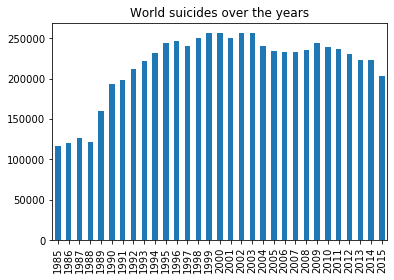

The year with the highest suicide number is 1999
The year with the lowest suicide number is 1985


In [16]:
%load external_help.py

# world n suicides over the years
# years of min - max n suicides

all_years = data["year"].unique()
all_years.sort()
per_year = {}
for year in all_years:
    if year == 2016:
        continue
    year_info = data.loc[data["year"] == year]
    per_year[year] = year_info["suicides_no"].sum()

sa = pd.Series(per_year)

sa.plot(kind="bar", title="World suicides over the years")
plt.show()

max_year = max(per_year, key=lambda k: per_year[k])
print("The year with the highest suicide number is {}".format(max_year))

min_year = min(per_year, key=lambda k: per_year[k])
print("The year with the lowest suicide number is {}".format(min_year))